In [26]:
# РАЗДЕЛ 3 Подбор параметров

# 1. Импорт необходимых модулей
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, roc_curve, auc
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:
# 2. Настройка визуализации

In [10]:
# 3. Загрузка данных
df = pd.read_csv('train.csv')

# 4. Подготовка данных
df.isnull().sum()
X = df.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis=1)
X = pd.get_dummies(X) # - преобразование категориальных признаков
X = X.fillna({'Age':X.Age.median()})
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [12]:
clf = tree.DecisionTreeClassifier()
parameters = {'criterion':['gini','entropy'], 'max_depth':range(1,30)}
gs_clf = GridSearchCV(clf, parameters, cv=5)

In [14]:
gs_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [15]:
gs_clf.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [16]:
best_clf = gs_clf.best_estimator_
best_clf.score(X_test, y_test)

0.7694915254237288

In [17]:
# сохраним предсказанные значения
y_pred = best_clf.predict(X_test) 

In [20]:
precision_score(y_test, y_pred)

0.7452830188679245

In [23]:
recall_score(y_test, y_pred)

0.6583333333333333

In [24]:
y_pred_prob = best_clf.predict_proba(X_test) 

In [27]:
# Построим ROC кривую

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

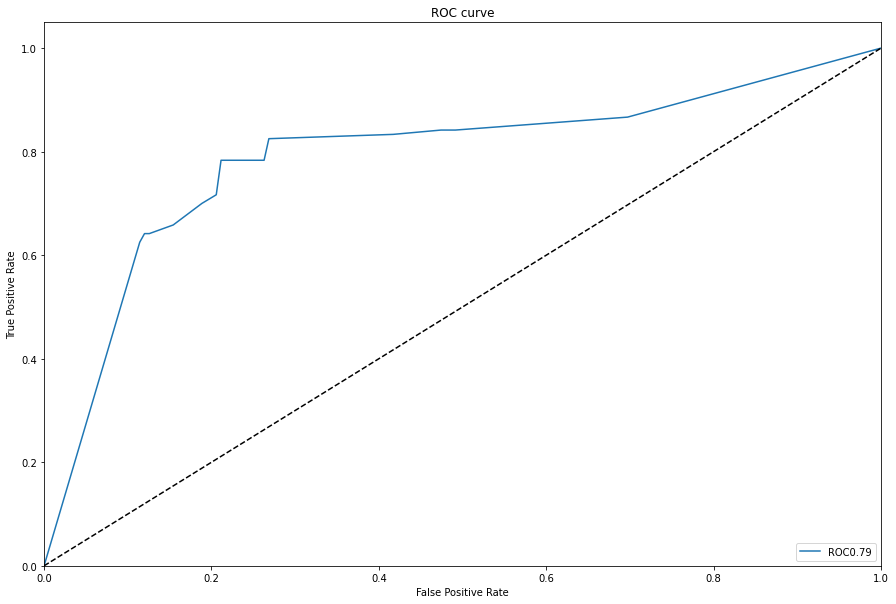

In [30]:
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label='ROC%0.2f' % (roc_auc))
plt.plot([0,1], [0,1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')